<a href="https://colab.research.google.com/github/Sanvideep/IPL-score-prediction/blob/main/IPL_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

# **Exploring the dataset**

In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.shape

(76014, 15)

In [5]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


# **Data Cleaning**

Points covered under this section:

*• Removing unwanted columns*

*• Keeping only consistent teams*

*• Removing the first 5 overs data in every match*

*• Converting the column 'date' from string into datetime object*

In [7]:
#Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [8]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [9]:
df.shape

(76014, 9)

In [10]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
# Keeping only the consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [15]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
#Removing first 5 overs data in every match due to inconsistent data in first 5 over
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [17]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print(df['date'].dtype)

datetime64[ns]


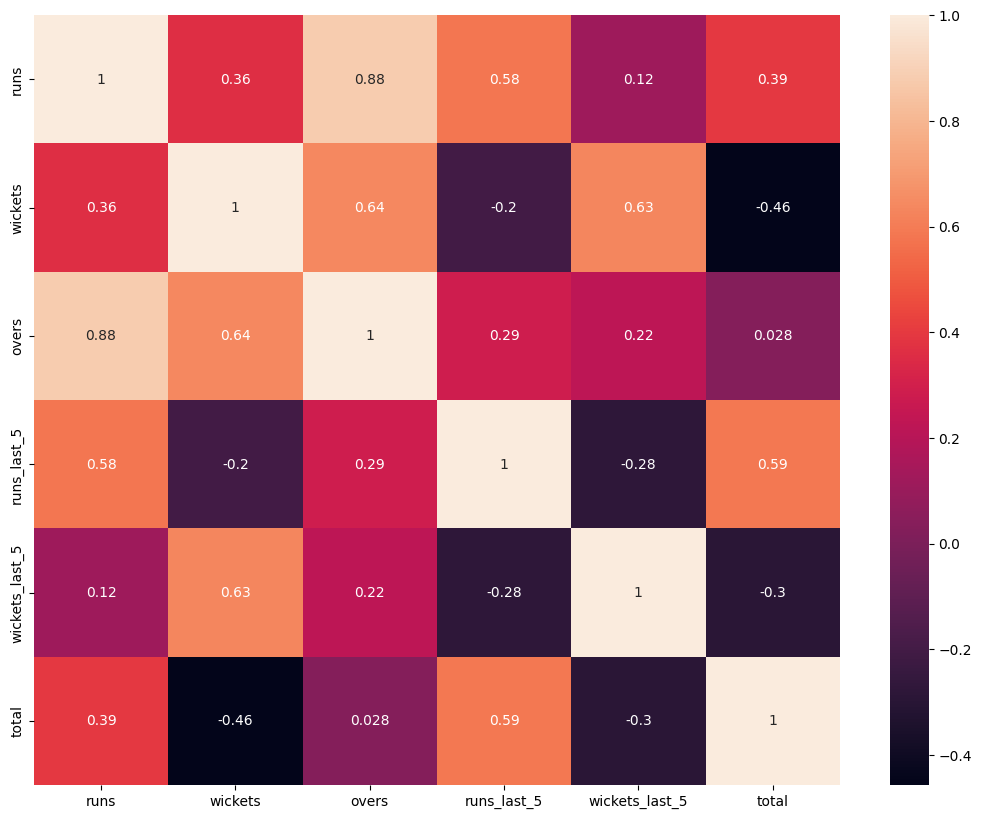

In [18]:
# Get correlation of all the features of the dataset
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, color='blue')

# **Data Preprocessing**
*• Handling categorical features*

*• Splitting dataset into train and test set on the basis of date*

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [20]:
# One Hot Encoding- to convert the categorical value to numerical
encoded_df=pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
bool_cols = encoded_df.select_dtypes(include='bool').columns
encoded_df[bool_cols] = encoded_df[bool_cols].astype(int)

In [21]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [26]:
from pandas._libs.tslibs.offsets import YearBegin
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

Y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
Y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


# **MODEL BUILDING**

In [27]:

# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [29]:
# Predicting results
y_pred_lr=linear_regressor.predict(X_test)

In [35]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, y_pred_lr))))

Mean Absolute Error (MAE): 12.118617546193299
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [34]:
y_pred_dt= decision_regressor.predict(X_test)

In [36]:
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, y_pred_dt))))

Mean Absolute Error (MAE): 17.019438444924408
Mean Squared Error (MSE): 542.7674586033118
Root Mean Squared Error (RMSE): 23.297370207886377


Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,Y_train)
y_pred_rf= random_regressor.predict(X_test)

Out of all the models the best results have been given by Linear Regression, so we will use it in AdaBoost

AdaBoost Algorithm

In [42]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, Y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [43]:
y_pred_adb=adb_regressor.predict(X_test)

In [47]:
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, y_pred_adb))))

Mean Absolute Error (MAE): 12.138455617595156
Mean Squared Error (MSE): 247.35368043302682
Root Mean Squared Error (RMSE): 15.727481693933928
